In [1]:
# importing libraries

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading datasets

In [4]:
df = pd.read_csv(r"C:\Users\apple\Downloads\New folder\avocado.csv")

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.shape

(18249, 14)

In [9]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [13]:
# There are no null values in the dataset

In [14]:
# there are three object data type i.e Date, type and region

In [15]:
# So we have to change feature'Date' from object to date type

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Day'] = df['Date'].apply(lambda x:x.day)

In [17]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [18]:
# Now there is no need of 'Date' feature

In [19]:
df.drop('Date',axis=1,inplace=True)

In [20]:
df.shape

(18249, 14)

In [21]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [22]:
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [23]:
# We have four different years so we can divide our dataset into organic and conventional avocados types

In [24]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [25]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

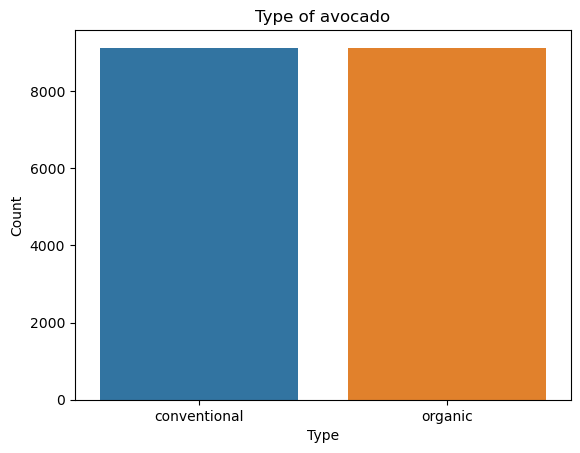

In [26]:
sns.countplot(x='type',data=df)
plt.title('Type of avocado')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [27]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [28]:
# So there are 9126 conventional avocado and 9123 organic avocado in the Type column

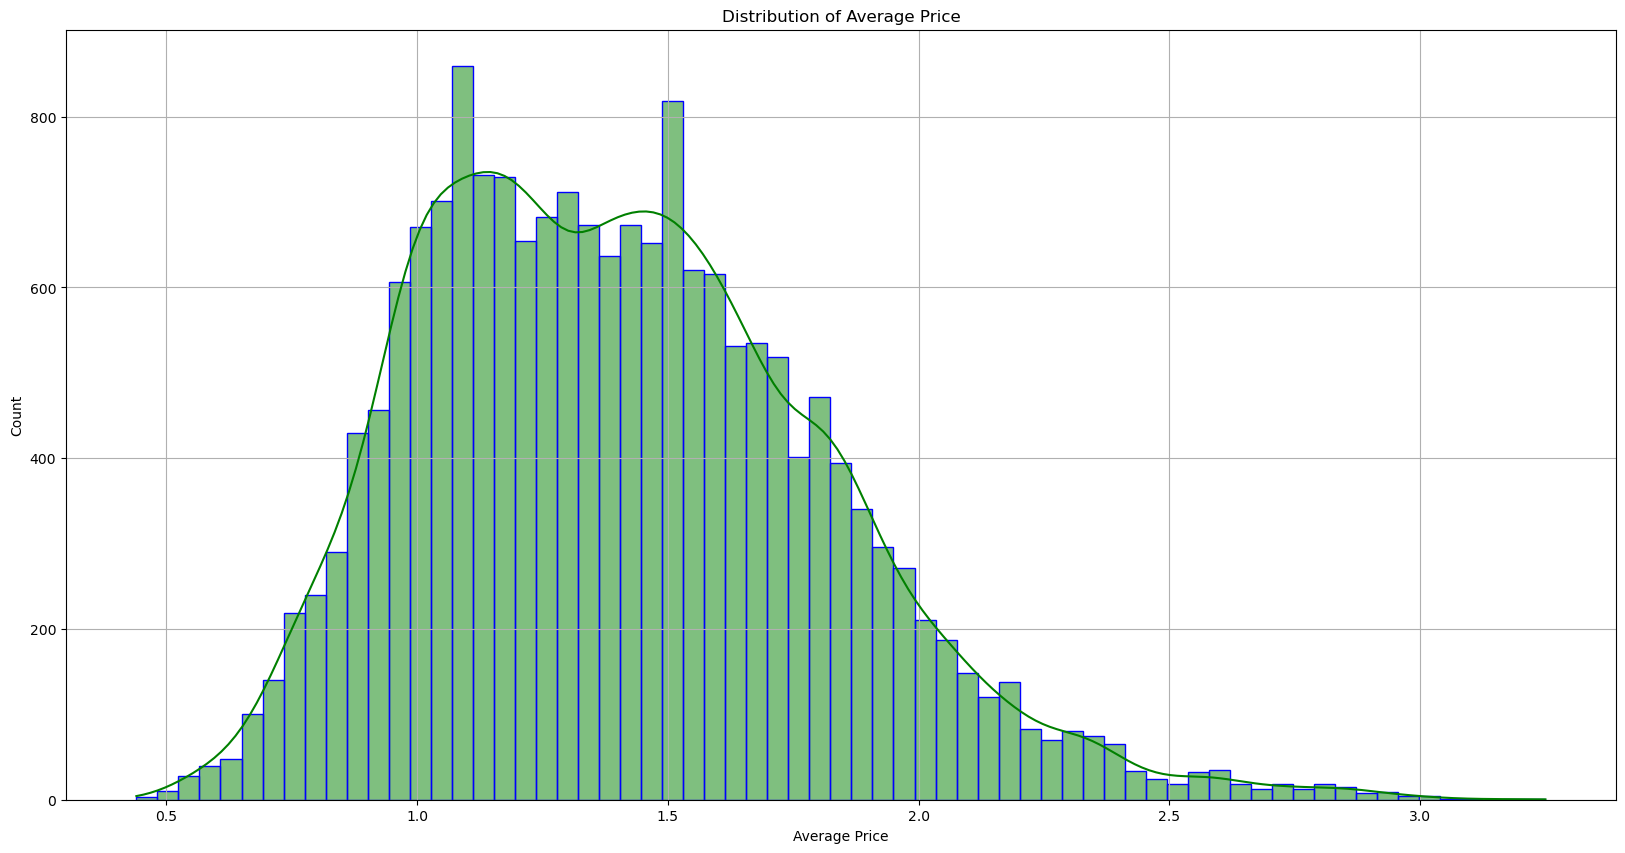

In [29]:
plt.figure(figsize=(20,10))
sns.histplot(df['AveragePrice'],kde = True,color='green', edgecolor = 'blue')
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [30]:
# So Average price is moderately right skewed

In [31]:
# So there more datapoints in the range of avearage price from 1.1 to 1.5

In [32]:
df['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

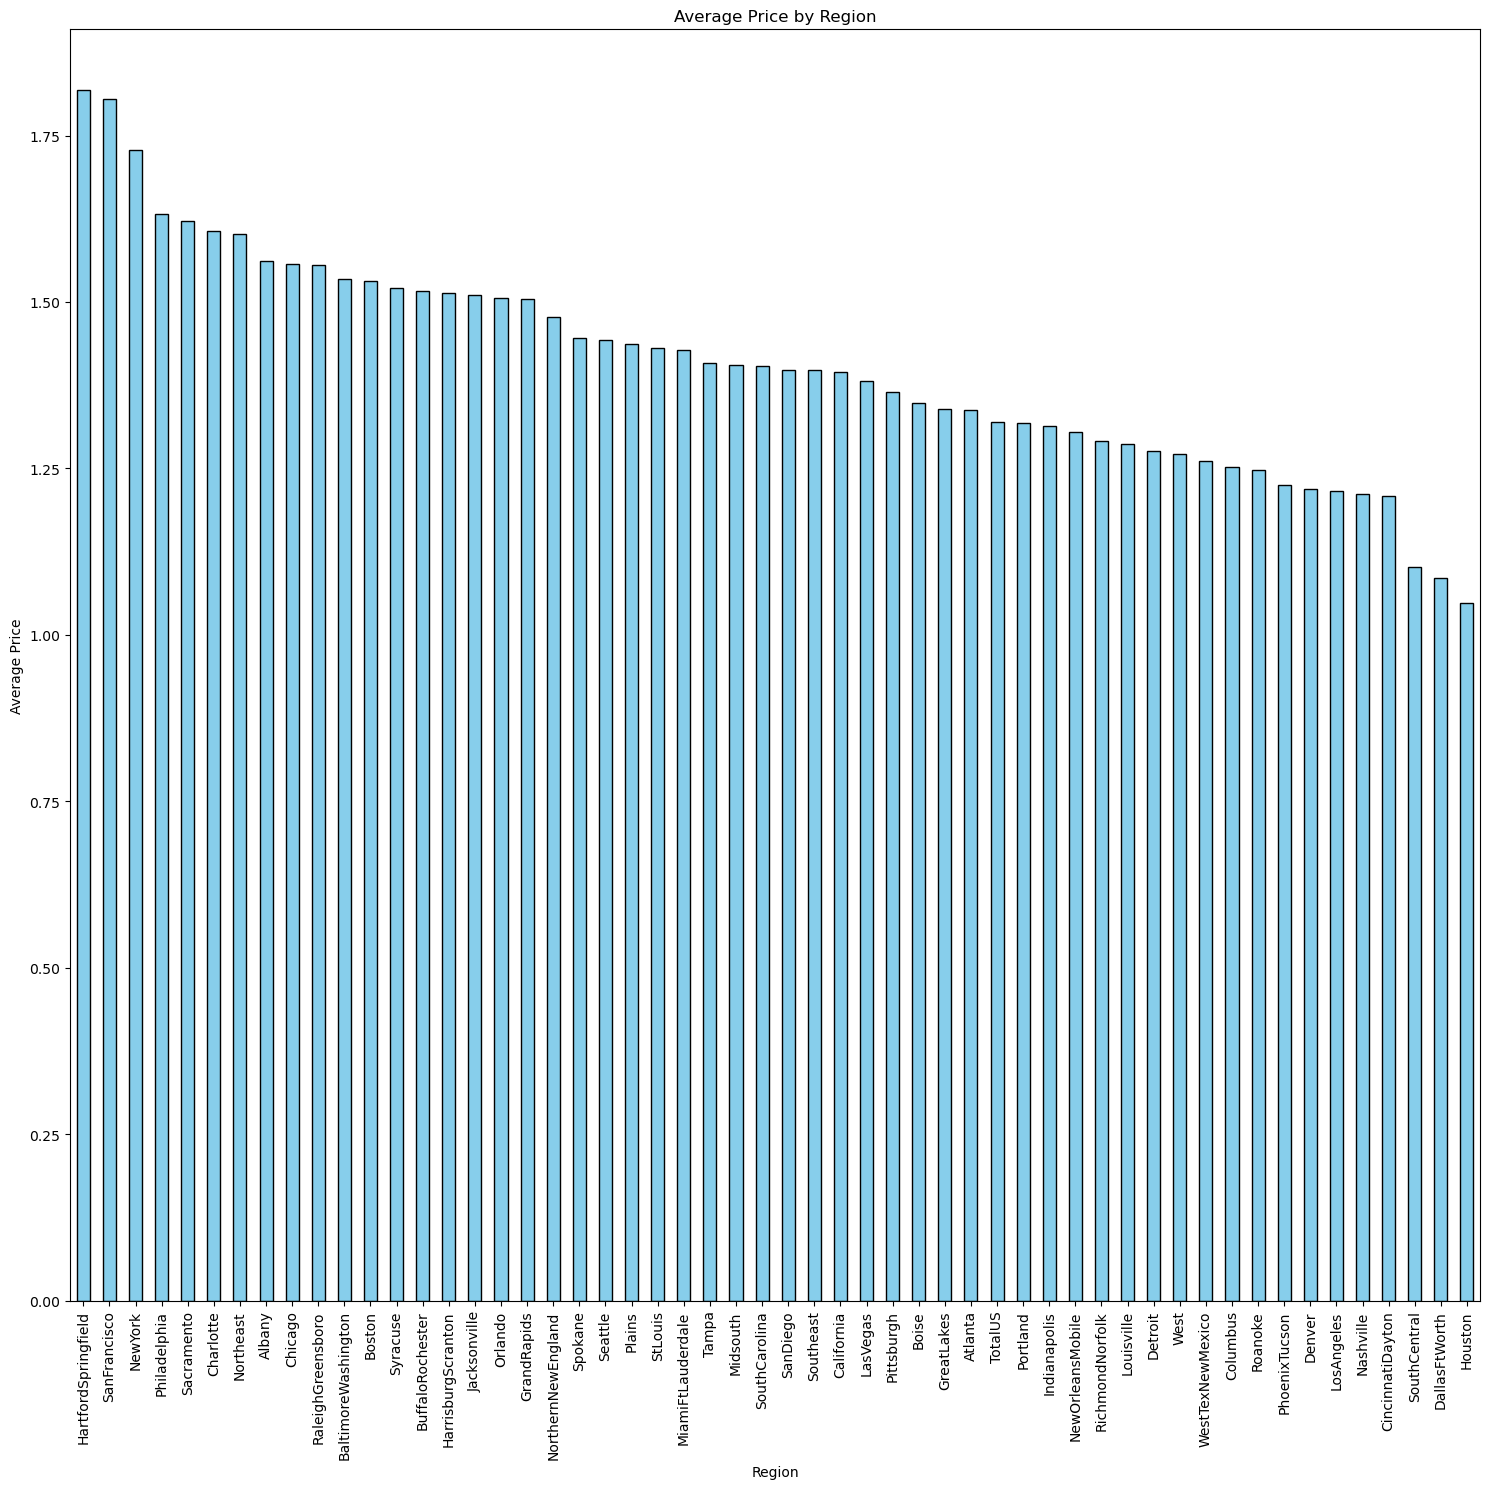

In [33]:
plt.figure(figsize = (15,15))
average_prices = df.groupby(['region'])['AveragePrice'].mean().sort_values(ascending = False)
average_prices.plot(kind = 'bar',color = 'skyblue',edgecolor = 'black')
plt.title('Average Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

In [34]:
df.groupby('region')['AveragePrice'].mean().sort_values(ascending = False)

region
HartfordSpringfield    1.818639
SanFrancisco           1.804201
NewYork                1.727574
Philadelphia           1.632130
Sacramento             1.621568
Charlotte              1.606036
Northeast              1.601923
Albany                 1.561036
Chicago                1.556775
RaleighGreensboro      1.555118
BaltimoreWashington    1.534231
Boston                 1.530888
Syracuse               1.520325
BuffaloRochester       1.516834
HarrisburgScranton     1.513284
Jacksonville           1.510947
Orlando                1.506213
GrandRapids            1.505000
NorthernNewEngland     1.477396
Spokane                1.445592
Seattle                1.442574
Plains                 1.436509
StLouis                1.430621
MiamiFtLauderdale      1.428491
Tampa                  1.408846
Midsouth               1.404763
SouthCarolina          1.403284
SanDiego               1.398166
Southeast              1.398018
California             1.395325
LasVegas               1.380917
P

In [35]:
# These are the top 5 regions with highest average price-[HartfordSpringField, SanFrancisco, NewYork, Philadelphia, Sacramento]

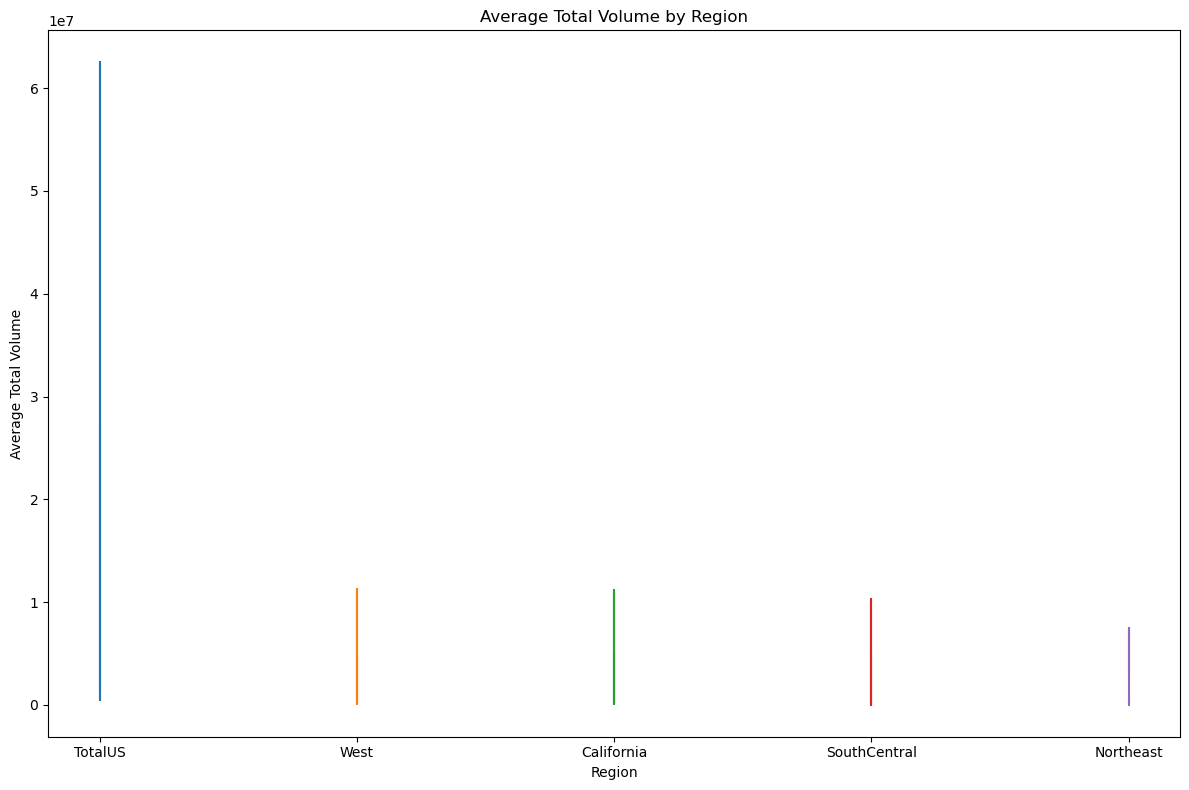

In [36]:
average_total_volume = df.groupby(['region'])['Total Volume'].mean().sort_values(ascending = False)
high_consumption_region = average_total_volume.nlargest(5).index
high_consumption_df = df[df['region'].isin(high_consumption_region)] 
plt.figure(figsize = (12,8))
for region in high_consumption_region:
    region_data = high_consumption_df[high_consumption_df['region'] == region]
    plt.plot(region_data['region'], region_data['Total Volume'], label = region)

plt.title('Average Total Volume by Region')
plt.xlabel('Region')
plt.ylabel('Average Total Volume')
plt.tight_layout()
plt.show()

In [37]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: count, dtype: int64

In [38]:
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [39]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


<Axes: xlabel='year', ylabel='AveragePrice'>

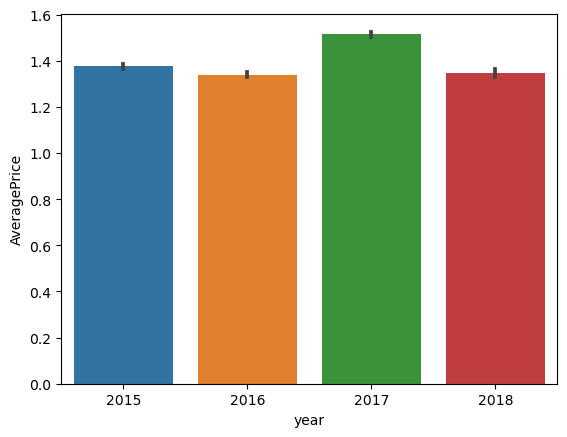

In [40]:
sns.barplot(x = 'year', y = 'AveragePrice', data = df)

<Axes: xlabel='Month', ylabel='AveragePrice'>

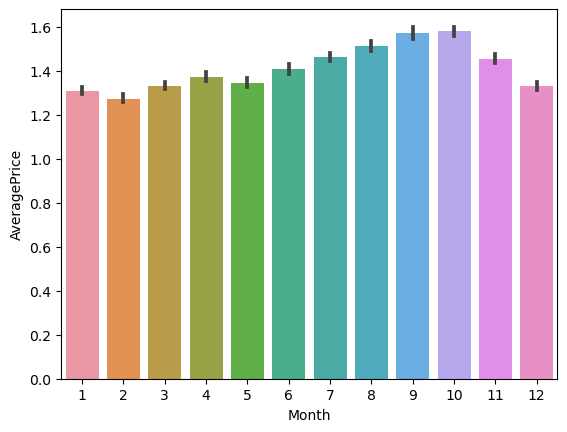

In [41]:
sns.barplot(x = 'Month', y = 'AveragePrice', data = df)

In [42]:
# we can infer from above that Year 2017 has highest average price compared to other years and there is less difference among rest of the years

In [43]:
# And September and october are the months with highest average price

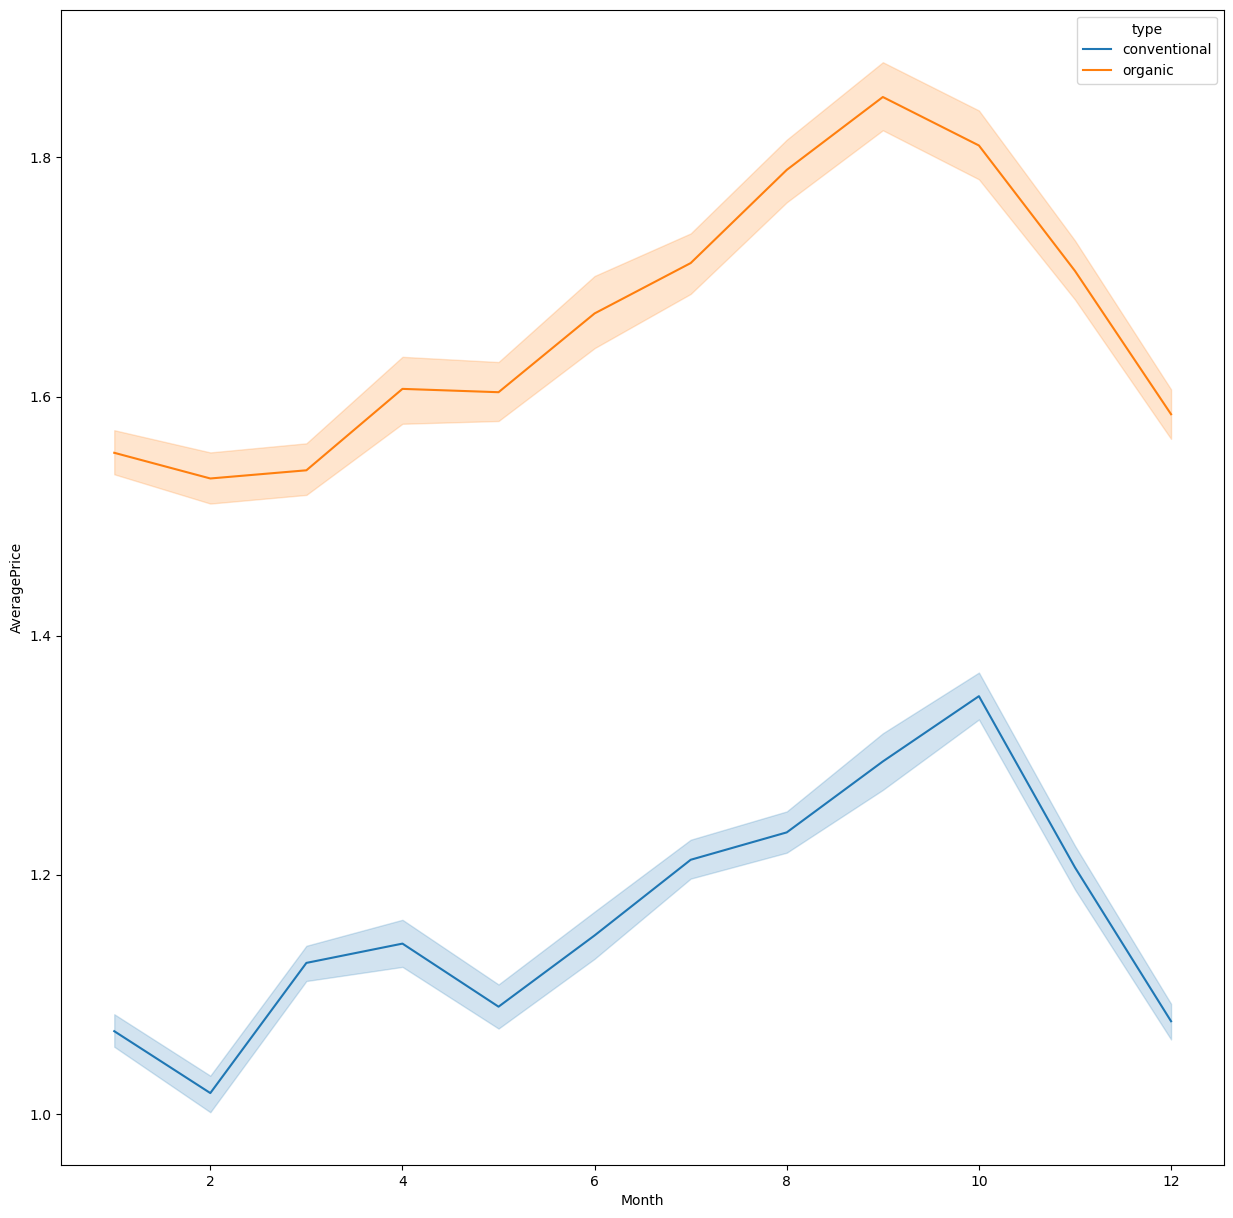

In [44]:
plt.figure(figsize = (15,15))
sns.lineplot(x='Month',y='AveragePrice', hue='type',data=df)
plt.show()

In [45]:
# Now looks there is hike for both organic and conventional avocado in 8 to 12 months 

array([[<Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>,
        <Axes: title={'center': '4046'}>,
        <Axes: title={'center': '4225'}>],
       [<Axes: title={'center': '4770'}>,
        <Axes: title={'center': 'Total Bags'}>,
        <Axes: title={'center': 'Small Bags'}>,
        <Axes: title={'center': 'Large Bags'}>],
       [<Axes: title={'center': 'XLarge Bags'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

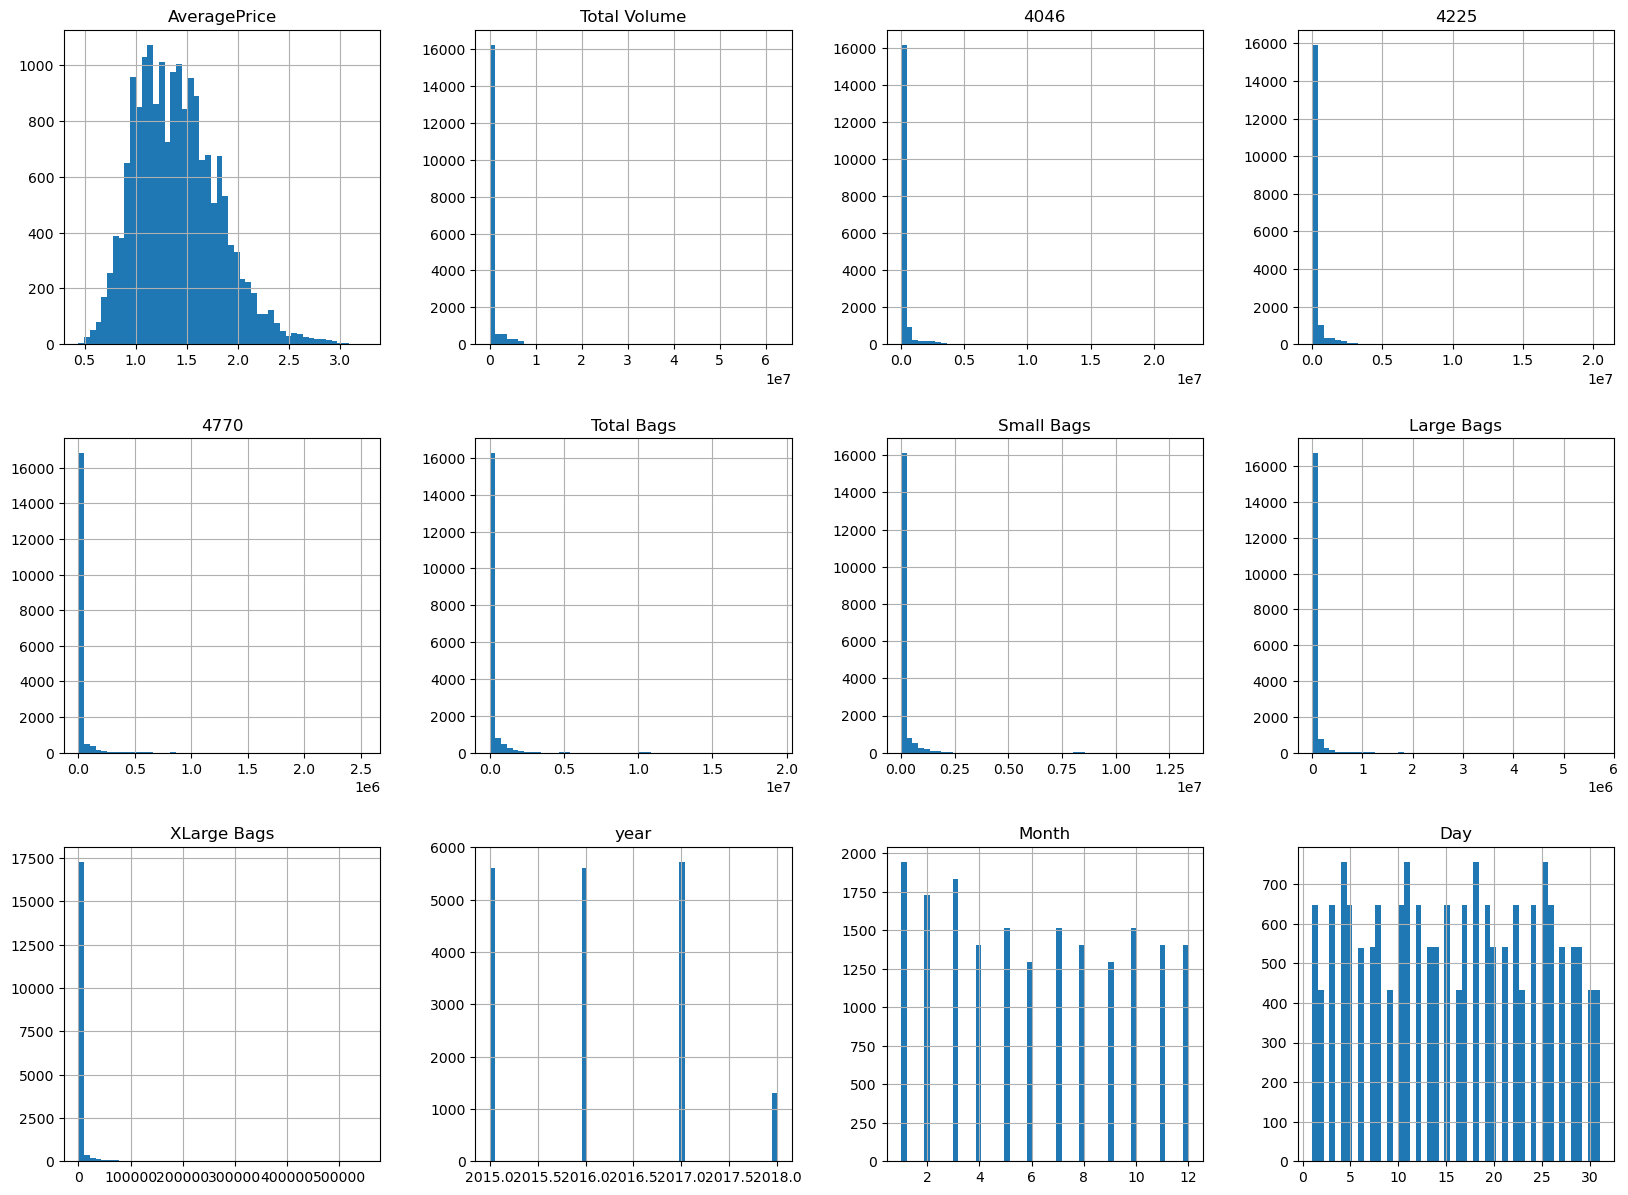

In [46]:
df.hist(figsize = (20,20), bins = 50, grid = True, layout = (4,4))

In [47]:
# Average price column is normally distributed

In [48]:
# Rest of the data are not varying in terms of numbers so they are almost left skewed 

In [49]:
numeric_columns = df.select_dtypes(include = ['number'])

In [50]:
skewness = numeric_columns.skew()

In [51]:
skewness

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

In [52]:
#Average price are moderately skewed distributed

In [53]:
# So there are relatively more low Average prices and a few high Average prices in the dataset

In [54]:
#And columns like 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' are  Highly right skewed 

In [55]:
# Columns like 'Month' ,'Day' and 'year' are close to zero indicating symmetric distribution of data

In [56]:
# Using label encoding we will convert categorical data into numerical values

In [57]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['region'] = label.fit_transform(df['region'])
df['type'] = label.fit_transform(df['type'])

In [58]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int32(2), int64(3)
memory usage: 1.8 MB


AveragePrice       Axes(0.125,0.712609;0.168478x0.167391)
Total Volume    Axes(0.327174,0.712609;0.168478x0.167391)
4046            Axes(0.529348,0.712609;0.168478x0.167391)
4225            Axes(0.731522,0.712609;0.168478x0.167391)
4770               Axes(0.125,0.511739;0.168478x0.167391)
Total Bags      Axes(0.327174,0.511739;0.168478x0.167391)
Small Bags      Axes(0.529348,0.511739;0.168478x0.167391)
Large Bags      Axes(0.731522,0.511739;0.168478x0.167391)
XLarge Bags         Axes(0.125,0.31087;0.168478x0.167391)
type             Axes(0.327174,0.31087;0.168478x0.167391)
year             Axes(0.529348,0.31087;0.168478x0.167391)
region           Axes(0.731522,0.31087;0.168478x0.167391)
Month                  Axes(0.125,0.11;0.168478x0.167391)
Day                 Axes(0.327174,0.11;0.168478x0.167391)
dtype: object

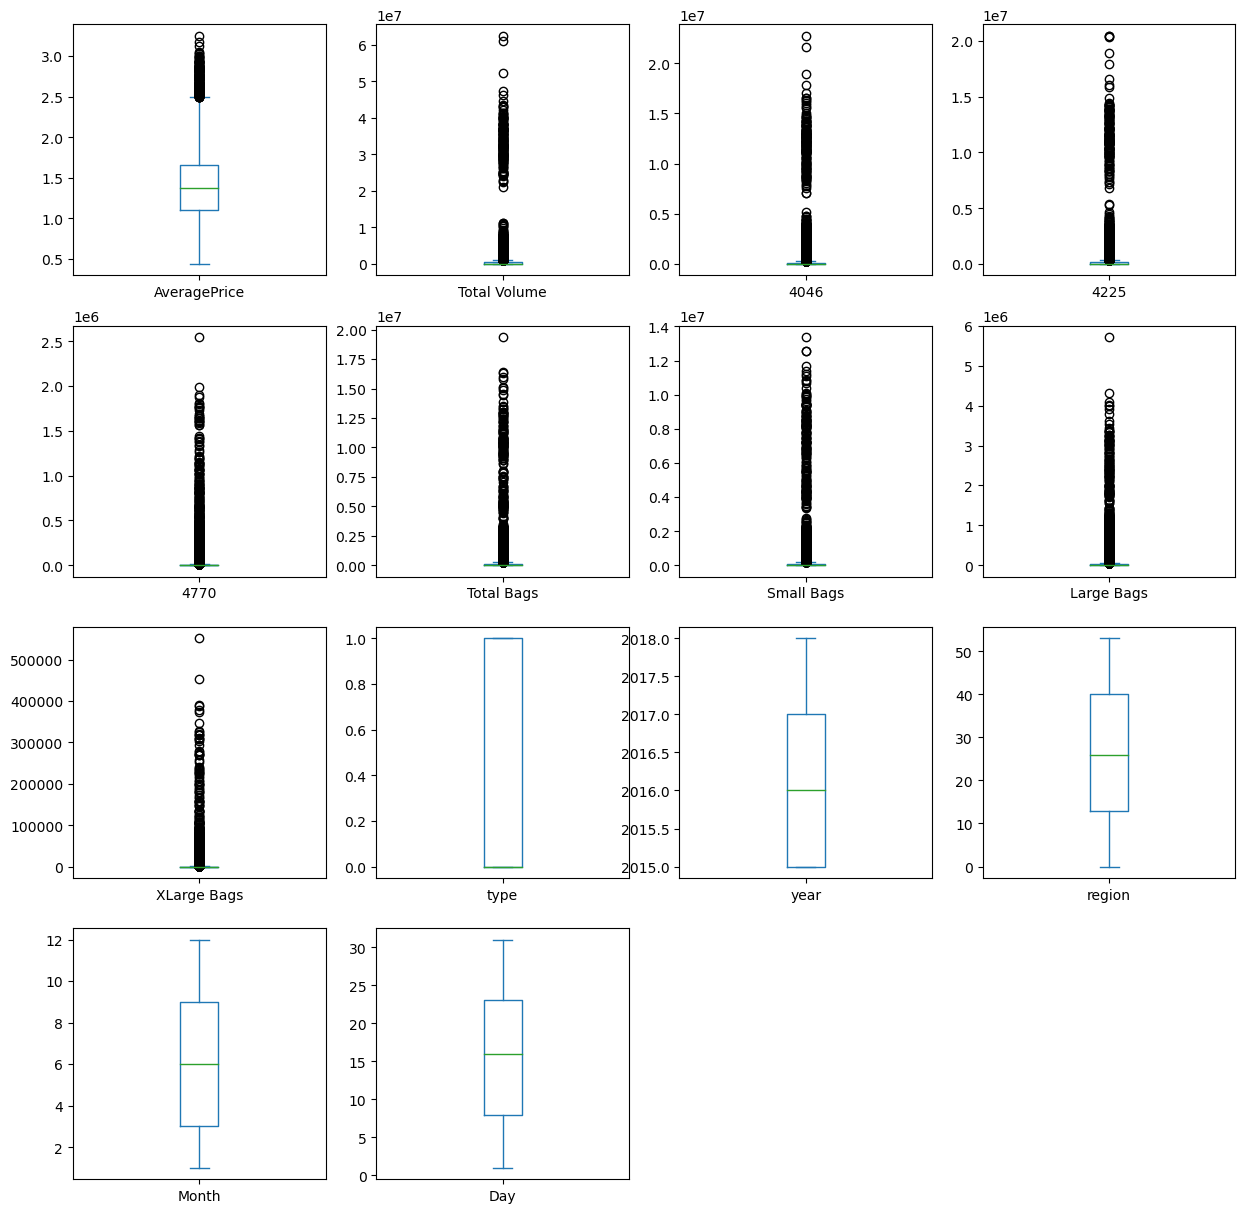

In [60]:
df.plot(kind = 'box', subplots = True, layout = (4,4), figsize = (15,15))

In [61]:
# We will remove them step by step 

In [62]:
# As seen that there are many outliers in the datasets 

In [63]:
from scipy.stats import zscore
z = zscore(df)
print(z)

       AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0         -0.188689     -0.227716 -0.230816 -0.199902 -0.212091   -0.234170   
1         -0.139020     -0.230427 -0.231103 -0.208054 -0.211997   -0.233350   
2         -1.182069     -0.212085 -0.231007 -0.154478 -0.211325   -0.234730   
3         -0.809551     -0.223444 -0.230741 -0.185350 -0.211864   -0.237096   
4         -0.312861     -0.231538 -0.230891 -0.208719 -0.211834   -0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347     -0.241373 -0.230017 -0.243857 -0.212540   -0.229301   
18245      0.755023     -0.242296 -0.230693 -0.242277 -0.212540   -0.233594   
18246      1.152375     -0.242331 -0.230693 -0.243090 -0.205766   -0.233463   
18247      1.301382     -0.241625 -0.230428 -0.242651 -0.205774   -0.231866   
18248      0.531512     -0.241253 -0.229347 -0.243170 -0.210450   -0.230807   

       Small Bags  Large Bags  XLarge Bags      typ

In [64]:
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))
(18249, 14)


In [65]:
df_new = df[(z<3).all(axis = 1)]

In [66]:
print(df.shape)
print(df_new.shape)

(18249, 14)
(17651, 14)


In [67]:
# Now we have removed outliers

In [68]:
df = df_new

In [69]:
df.shape

(17651, 14)

In [70]:
df_2 = df.copy()

In [71]:
# We will drop columns like 'type' and 'region' as they are of no use in our analysis

In [72]:
df_2= df_2.drop(['type', 'region'], axis = 1)

In [73]:
df_2.drop(['AveragePrice','year','Month','Day'], axis = 1, inplace = True)

In [74]:
df_2.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


In [75]:
df_2.skew()

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
dtype: float64

In [76]:
df_2 = np.log1p(df_2)

In [77]:
df_2.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0


In [78]:
df_2.skew()

Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
dtype: float64

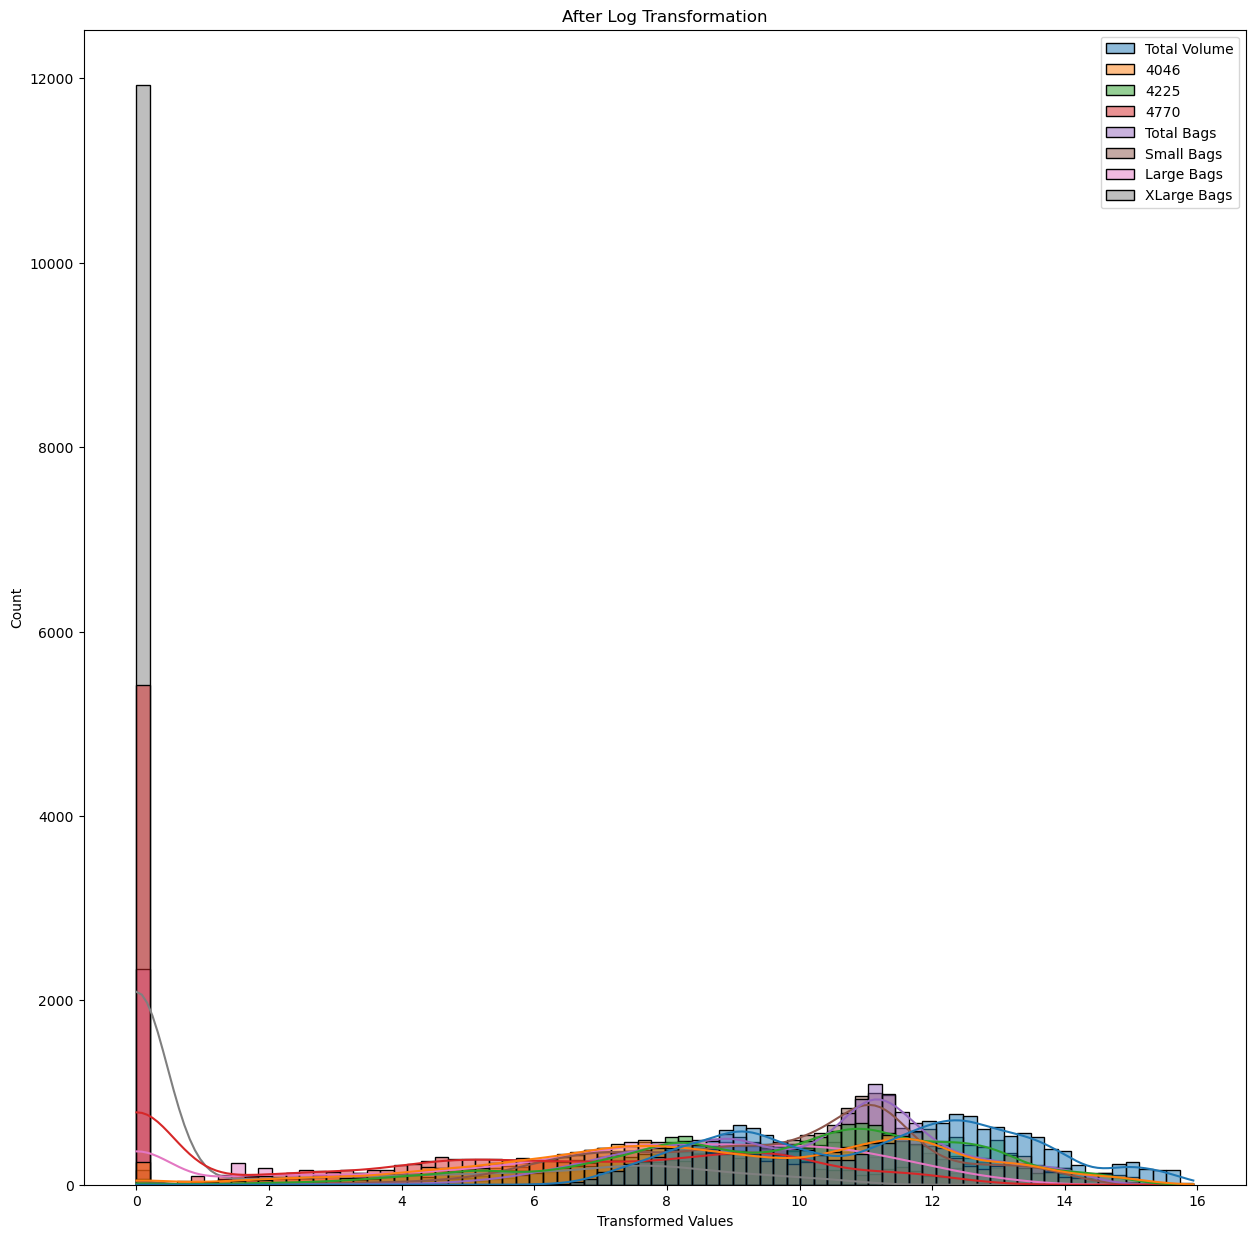

In [79]:
plt.figure(figsize = (15,15))
sns.histplot(df_2,kde = True, color = 'skyblyue', edgecolor = 'black')
plt.title('After Log Transformation')
plt.xlabel('Transformed Values')
plt.ylabel('Count')
plt.show()

In [80]:
df_2.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0


In [81]:
cols = ['AveragePrice', 'Month', 'Day','year','type','region']
selected_columns = df[cols]
df_2 = pd.concat([df_2,selected_columns], axis = 1)

In [82]:
df_2.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,AveragePrice,Month,Day,year,type,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,1.33,12,27,2015,0,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,1.35,12,20,2015,0,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0.93,12,13,2015,0,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,1.08,12,6,2015,0,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,1.28,11,29,2015,0,0


In [83]:
# Multivariate Analysis

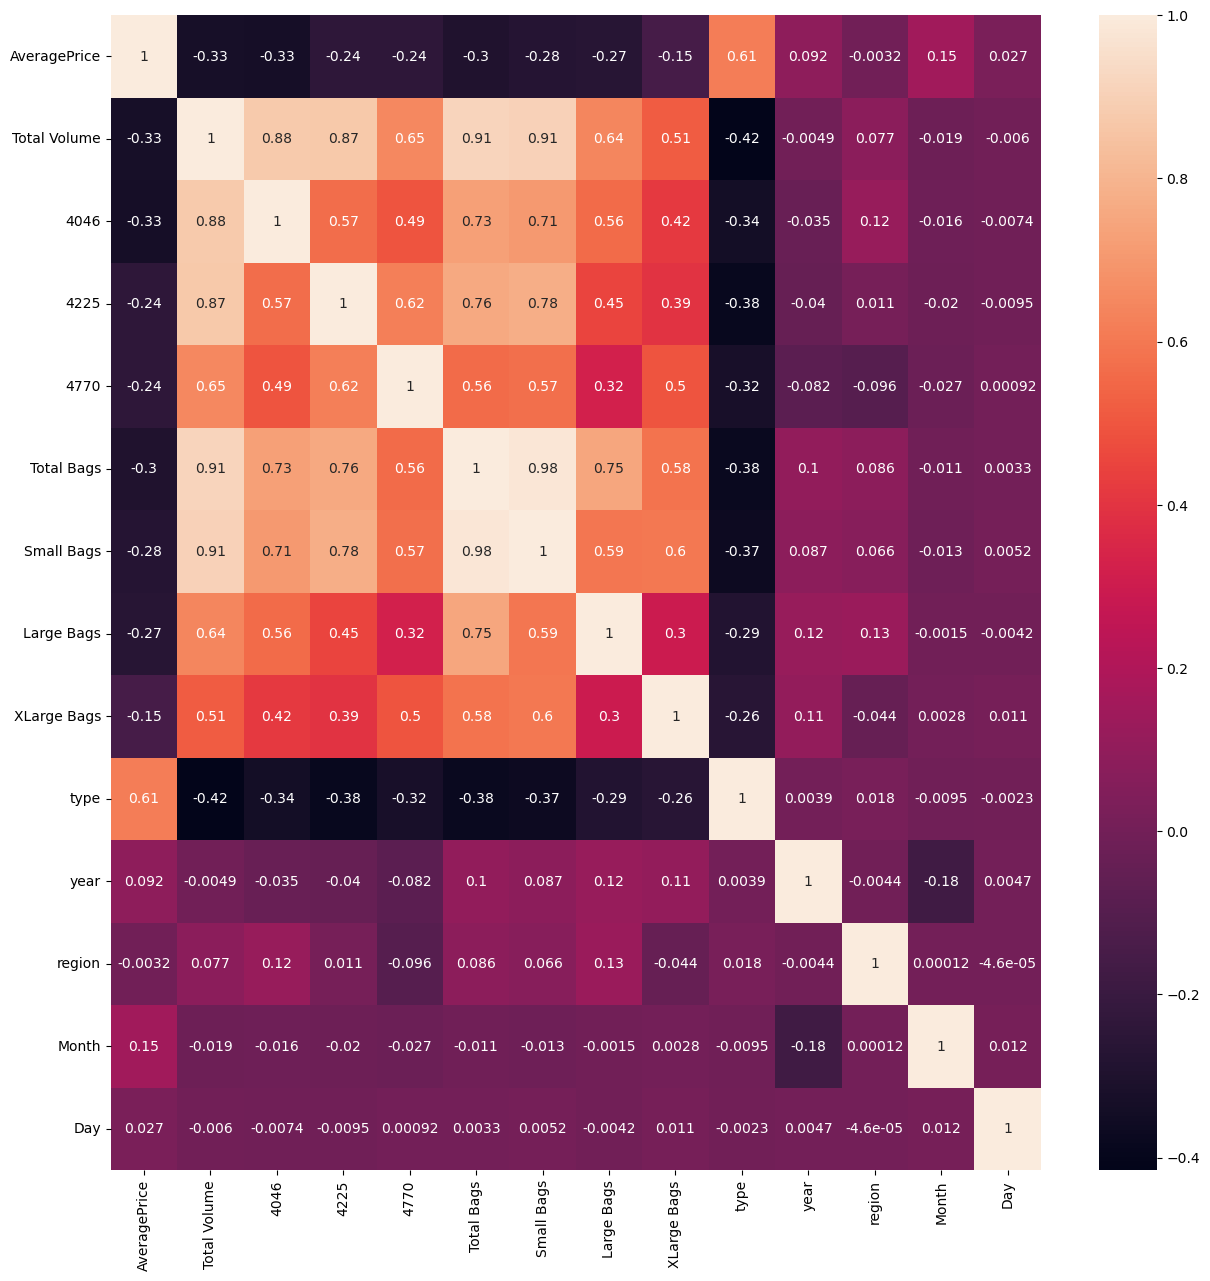

In [84]:
df_2_cor = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(df_2_cor, annot = True)
plt.show()

In [85]:
# As we can see that 'AveragePrice' is coorelated with 'Type' feature 

In [86]:
# As we can say that 'total bags' and 'small bags' are  highly coorelated  with 'total volume'

In [87]:
# Also 'Small bags' and 'total bags' are highly coorelated 

In [88]:
# Hence we will drop columns like 'Total Volume' and 'Total Bags' to avoid multicollinearity 

In [105]:
df = df_2.copy()

In [106]:
df.drop(['Total Volume', 'Total Bags'], axis = 1, inplace = True)

In [107]:
df.columns

Index(['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'AveragePrice', 'Month', 'Day', 'year', 'type', 'region'],
      dtype='object')

In [108]:
df.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,AveragePrice,Month,Day,year,type,region
0,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,1.33,12,27,2015,0,0
1,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,1.35,12,20,2015,0,0
2,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,0.93,12,13,2015,0,0
3,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,1.08,12,6,2015,0,0
4,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,1.28,11,29,2015,0,0


In [93]:
# Now training our data to find the best model 

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

In [95]:
x = df.drop(['AveragePrice'], axis = 1)

In [96]:
y= df['AveragePrice']

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [98]:
models = [('LinearRegression',LinearRegression()), ('Ridge',Ridge()), ('Lasso',Lasso()), ('DecisionRegressor',DecisionTreeRegressor()),('RandomForestRegressor',RandomForestRegressor()), ('GradientBoostingRegressor',GradientBoostingRegressor()), ('SVR',SVR())]

In [99]:
results = {}
for name,model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model :{name}")
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")
    print(f"R2 Score : {r2}")

Model :LinearRegression
Mean Absolute Error : 0.21560074943495464
Mean Squared Error : 0.07524636566827457
R2 Score : 0.49896039964359384
Model :Ridge
Mean Absolute Error : 0.2156001414472711
Mean Squared Error : 0.0752459527927807
R2 Score : 0.49896314883912785
Model :Lasso
Mean Absolute Error : 0.31564782860950014
Mean Squared Error : 0.15018888729315902
R2 Score : -5.600800817040508e-05
Model :DecisionRegressor
Mean Absolute Error : 0.12199864038069339
Mean Squared Error : 0.03388905506458191
R2 Score : 0.774344468929303
Model :RandomForestRegressor
Mean Absolute Error : 0.09267187854067528
Mean Squared Error : 0.017181010700203943
R2 Score : 0.8855975746004862
Model :GradientBoostingRegressor
Mean Absolute Error : 0.15314417982251965
Mean Squared Error : 0.039692227408378425
R2 Score : 0.7357031455097313
Model :SVR
Mean Absolute Error : 0.27127848393912407
Mean Squared Error : 0.11570812946779206
R2 Score : 0.2295394676985305


In [100]:
# Random forest regressor is the best model to perform regression with low  mean absolute error and mean absolute errors and high r2 score values out of other models 

In [101]:
# Now it's time to tune the hyperparameters to produce better results out of it 

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
rf = RandomForestRegressor(random_state = 42)

In [103]:
param_grid = {'n_estimators' :[100, 200, 300,], 'max_depth' :[None, 10, 20], 'min_samples_split':[2, 5, 10], 'min_samples_leaf' : [1, 2, 4]}

In [104]:
grid_search = GridSearchCV(estimator = rf, param_grid= param_grid, cv = 5, n_jobs = -1)

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best model evaluation metrics:")
print(f"Mean Absolute Error : {mae}")
print(f"Mean Squared Error : {mse}")
print(f"R2 Score : {r2}"

In [102]:
# Now let's try to predict the price of avocado based on region

In [119]:
df_3 = df_2.copy()

In [113]:
df_3.drop(['Total Volume', 'Total Bags'], axis = 1, inplace = True)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score

In [120]:
x = df_3.drop(['region'], axis = 1)
y = df_3['region']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
models = [('LogisticRegression',LogisticRegression()), ('RandomForestClassifier',RandomForestClassifier()), ('DecisionTreeClassifier',DecisionTreeClassifier()), ('SVC',SVC())]
for name,model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    classification = classification_report(y_test, y_pred)
    print(f"Model :{name}")
    print(f"Accuracy : {accuracy}")
    print(f"Precision : {precision}")
    print(f"Recall : {recall}")
    print(f"F1 Score : {f1}")
    print(f"Classification Report : {classification}")

Model :LogisticRegression
Accuracy : 0.1878540675277589
Precision : 0.17550850807984544
Recall : 0.1878540675277589
F1 Score : 0.1705945089770798
Classification Report :               precision    recall  f1-score   support

           0       0.28      0.31      0.29        86
           1       0.14      0.24      0.18        87
           2       0.13      0.15      0.14        80
           3       0.06      0.04      0.05        81
           4       0.16      0.19      0.17        80
           5       0.05      0.03      0.04        91
           6       0.32      0.41      0.36        75
           7       0.42      0.34      0.38        96
           8       0.36      0.51      0.43        72
           9       0.20      0.25      0.22        93
          10       0.11      0.05      0.07        77
          11       0.18      0.24      0.21        84
          12       0.07      0.17      0.10        86
          13       0.00      0.00      0.00        73
          14       

In [121]:
# RandomForestClassifier performs best among the models 

In [124]:
from sklearn.model_selection import GridSearchCV

In [122]:
rf = RandomForestClassifier()
param_grid = {'n_estimators' :[100, 200, 300,], 'max_depth' :[None, 10, 20], 'min_samples_split':[2, 5, 10], 'min_samples_leaf' : [1, 2, 4]}

In [125]:
grid_search = GridSearchCV(estimator = rf, param_grid= param_grid, cv = 5, n_jobs = -1)

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
print("Best parameters:", grid_search.best_params_)

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
test_pred = best_model.predict(x_test)

In [ ]:
print(classification_report(y_test, test_pred))

In [ ]:
# Save the trained model to a file

In [ ]:
import pickle

In [ ]:
with open('HR_ANALYTICS_PROJECT.pkl', 'wb') as f:
    pickle.dump(best_svc, f)